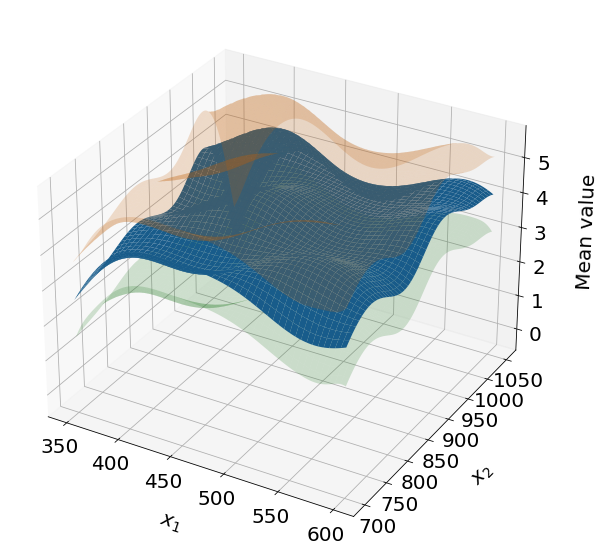

In [45]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# load data -----
Rs = np.load('../data/source_reward.npy')
lxy = np.arange(700, 1100, 50)
dia = np.arange(350, 650, 50)
X, Y = np.meshgrid(dia, lxy)

# scikit-learn gaussian process regression -----
X1, X2, R_train = X.flatten(), Y.flatten(), Rs.flatten()
X1, X2, R_train = X1.reshape(-1, 1), X2.reshape(-1, 1), R_train.reshape(-1, 1)
X_train = np.concatenate((X1, X2), axis=1)

# define kernel
kernel = 1 * RBF(10, (1e-3, 1e3))
gp = GPR(kernel=kernel, alpha=0.1, n_restarts_optimizer=10)
gp.fit(X_train, R_train)

lxy_test = np.linspace(350, 600, 1000)
dia_test = np.linspace(700, 1050, 1000)
X1_org_test, X2_org_test = np.meshgrid(lxy_test, dia_test)

X1_test, X2_test = X1_org_test.flatten(), X2_org_test.flatten()
X1_test, X2_test = X1_test.reshape(-1, 1), X2_test.reshape(-1, 1)
X_test = np.concatenate((X1_test, X2_test), axis=1)
R_GP, R_std = gp.predict(X_test, return_std=True)
R_GP = R_GP.reshape(len(dia_test), len(lxy_test))
R_std = R_std.reshape(len(dia_test), len(lxy_test))

# plot -----------------

Y=None
gpCov=True
save_plot=False


fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_org_test, X2_org_test, R_GP, linewidth=0.1)

if Y:
    ax.scatter3D(X[:, 0], X[:, 1], Y, c=Y, alpha=0.10)

if gpCov:
    zVal = 1.96
    ax.plot_surface(X1_org_test, X2_org_test, R_GP + zVal * np.sqrt(np.diag(R_std)), alpha=0.2, linewidth=0.1)
    ax.plot_surface(X1_org_test, X2_org_test, R_GP - zVal * np.sqrt(np.diag(R_std)), alpha=0.2, linewidth=0.1)
ax.xaxis.labelpad, ax.yaxis.labelpad, ax.zaxis.labelpad = 20, 20, 20
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel('$x_1$', fontsize=20)
ax.set_ylabel('$x_2$', fontsize=20)
ax.set_zlabel('Mean value', fontsize=20)
if save_plot:
    # save plot as pdf
    plt.savefig('figures/plot_gp_mean.pdf', format='pdf', bbox_inches='tight', dpi=1200)

plt.show()
